# A.P. Moller Maersk DS_ML Coding Challenge

### Performed By:
- **Name:** Aadith Sukumar
- **Official Email:** aadith.sukumar.btech2021@sitpune.edu.in
- **GitHub Profile:** [aadi1011](https://www.github.com/aadi1011)
- **LinkedIn Profile:** [Aadith Sukumar](https://www.linkedin.com/in/aadith-sukumar)

**Given Information About Dataset**<br>
Every row represents the sourcing of one unit of a particular product combination.<br>
A unique product combination comprises of attributes mentioned in Columns A,B,C,D,E,F<br>
Since each row represents 1 unit of sourcing; therefore, you will find multiple rows with the same combination in the training dataset. Imagine buying 1 quantity being represented as a single row.<br>
July 20 to May 21 is your training set and June 21 is your test set; So using the 11 months data (Training Set: June 2020 to May 2021) you'd have the forecast/predict the June 2021 number (Test Set)<br>
June 2021 has only a single value for each combination as that is your test set (target).<br>

**Objective**<br>
Iterate on ML models to come up closest to the Test set data using the Training Set Data.

**Expected**<br>
Understand the data set (even with the open questions you have)<br>
Do Exploratory Data Analysis.<br>
Use Python and it's libraries for all your development needs.<br>
Have a strategy for handling outliers / poor data quality on some rows.<br>
Come up with approaches for forecasting the June 21 test set.<br>
Compare and explain the different approaches you might have considered. (In your notebook)<br>
Explain the final approach you have taken and why. (In your notebook)<br>

---

## Importing Required Libraries

For this case study, we will be using the following libraries:
- **Pandas:** For data manipulation and analysis.
- **Numpy:** For numerical operations.
- **Matplotlib:** For data visualization.
- **Seaborn:** For data visualization.
- **Scikit-Learn:** For machine learning models.
- **XGBoost:** For XGBoost Regressor model.

## System Specifications
I will be using the following system configuration:
- **Processor:** Intel Core i5-9300H
- **RAM:** 16GB
- **System Type:** 64-bit Operating System, x64-based processor
- **Storage:** 1TB HDD
- **Graphics:** NVIDIA GeForce GTX 1650
- **Operating System:** Windows 10
- **Python Version:** 3.11.3

In [43]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# print library versions
print("Pandas version: {}".format(pd.__version__))
print("Numpy version: {}".format(np.__version__))
print("Seaborn version: {}".format(sns.__version__))
print("Sklearn version: {}".format(sklearn.__version__))
print("Matplotlib version: {}".format(matplotlib.__version__))

Pandas version: 2.0.3
Numpy version: 1.25.1
Seaborn version: 0.12.2
Sklearn version: 1.2.2
Matplotlib version: 3.7.1


## Loading the Dataset
*DS_ML_Coding_Challenge_Dataset.xlsx* is the dataset provided for this case study. We will load the dataset using the pandas library.<br>
It has been divided into two CSV files - `"TRAIN_DS_ML_Coding_Challenge_Dataset.csv"` and `"TEST_DS_ML_Coding_Challenge_Dataset.csv"`. We will load both the sheets into separate dataframes.

In [44]:
# load the data
train = pd.read_csv('./TRAIN_DS_ML_Coding_Challenge_Dataset.csv', header=0)
test = pd.read_csv('./TEST_DS_ML_Coding_Challenge_Dataset.csv', header=0)

#### Preview datasets

In [45]:
train.head(5)

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


In [46]:
test.head(5)

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-21,169.42


## Analysis of Dataset and Data Preprocessing

We will now analyze the dataset and perform data preprocessing steps to clean the data and make it suitable for training machine learning models.

**We will work only on the training dataset for now.**

The methods we will perform are:
1. Display Statistical Summary
2. Check for missing values
3. Check for duplicate rows
4. Check for outliers
5. Get column-wise information

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Manufacturer       550176 non-null  object 
 2   Area Code          550176 non-null  object 
 3   Sourcing Channel   550176 non-null  object 
 4   Product Size       550176 non-null  object 
 5   Product Type       550176 non-null  object 
 6   Month of Sourcing  550176 non-null  object 
 7   Sourcing Cost      550176 non-null  float64
dtypes: float64(1), object(7)
memory usage: 33.6+ MB


In [48]:
# Descriptive statistics for sourcing costs
train.describe()

,Sourcing Cost
count,550176.000000
mean,108.817286
std,104.390093
min,-196.070000
25%,57.000000
50%,132.000000
75%,146.150000
max,32632.500000


<div class="alert alert-block alert-info"> The 'Sourcing Cost' column represents the cost associated with sourcing a particular product. It has a mean value of approximately 108.82 units, with a standard deviation of around 104.39 units, indicating a considerable variation in costs. The distribution is skewed towards higher values, as evidenced by the large standard deviation and the presence of outliers, with the minimum value being -196.07 and the maximum value being 32632.50.</div>

In [49]:
# Check for missing values
train.isnull().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

<div class="alert alert-block alert-success"> There are a total of 8 columns in the dataset with NO MISSING VALUES!.</div>

In [50]:
# Get column wise information
train.columns

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Month of Sourcing', 'Sourcing Cost'],
      dtype='object')

In [51]:
# get unique values for each column
for col in train.columns:
    print(col, "has", len(train[col].unique()),"unique values", '\n',train[col].unique(), '\n')

ProductType has 3 unique values 
 ['NTM3' 'NTM2' 'NTM1'] 

Manufacturer has 3 unique values 
 ['X1' 'X2' 'X3'] 

Area Code has 45 unique values 
 ['A28' 'A9' 'A20' 'A18' 'A10' 'A19' 'A29' 'A7' 'A2' 'A8' 'A4' 'A6' 'A30'
 'A35' 'A44' 'A45' 'A31' 'A25' 'A37' 'A32' 'A34' 'A46' 'A11' 'A39' 'A41'
 'A17' 'A38' 'A5' 'A22' 'A3' 'A12' 'A24' 'A36' 'A42' 'A14' 'A43' 'A33'
 'A15' 'A40' 'A21' 'A16' 'A13' 'A1' 'A23' 'A26'] 

Sourcing Channel has 4 unique values 
 ['WHOLESALE' 'DIRECT' 'RETAIL' 'ECOM'] 

Product Size has 3 unique values 
 ['Large' 'Small' 'ExtraLarge'] 

Product Type has 2 unique values 
 ['Powder' 'Liquid'] 

Month of Sourcing has 11 unique values 
 ['May-21' 'Oct-20' 'Dec-20' 'Feb-21' 'Nov-20' 'Sep-20' 'Mar-21' 'Jan-21'
 'Apr-21' 'Jul-20' 'Aug-20'] 

Sourcing Cost has 4529 unique values 
 [1.016000e+01 1.342800e+02 1.246000e+01 ... 1.411072e+04 1.263047e+04
 3.705000e+03] 



### Preprocessing of Data

First we will convert the `Month of Sourcing` column to datetime format and then extract the year and month from it.

In [52]:
# convert `Month of Sourcing` to datetime format
train['Month of Sourcing'] = pd.to_datetime(train['Month of Sourcing'], format='%b-%y')
test['Month of Sourcing'] = pd.to_datetime(test['Month of Sourcing'], format='%b-%y')

# Extract year and month from `Month of Sourcing`
train['Sourcing Year'] = train['Month of Sourcing'].dt.year
train['Sourcing Month'] = train['Month of Sourcing'].dt.strftime('%b')

In [53]:
# Extract year and month from `Month of Sourcing` for test dataset
test['Sourcing Year'] = test['Month of Sourcing'].dt.year
test['Sourcing Month'] = test['Month of Sourcing'].dt.strftime('%b')

In [54]:
train.head(5)

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,Sourcing Year,Sourcing Month
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.16,2021,May
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.28,2020,Oct
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.46,2020,Dec
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.22,2021,Feb
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.76,2020,Nov


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ProductType        550176 non-null  object        
 1   Manufacturer       550176 non-null  object        
 2   Area Code          550176 non-null  object        
 3   Sourcing Channel   550176 non-null  object        
 4   Product Size       550176 non-null  object        
 5   Product Type       550176 non-null  object        
 6   Month of Sourcing  550176 non-null  datetime64[ns]
 7   Sourcing Cost      550176 non-null  float64       
 8   Sourcing Year      550176 non-null  int32         
 9   Sourcing Month     550176 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(7)
memory usage: 39.9+ MB


## Exploratory Data Analysis

We will now perform exploratory data analysis on the dataset to understand the data distribution and relationships between different columns.

### Frequency Distribution Analysis

Let's analyse the frequency distribution each feature over time.

In [56]:
# Define a mapping of month abbreviations to numerical values
month_order = ['Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21']

# Extract month and year components
train['Sourcing_Month'] = train['Month of Sourcing'].dt.strftime('%b-%y')

# Map the 'Sourcing_Month' column to its numerical values
train['Sourcing_Month_Num'] = train['Sourcing_Month'].map({month: i+1 for i, month in enumerate(month_order)})

# Sort the DataFrame based on 'Sourcing_Year' and 'Sourcing_Month_Num'
train_sorted = train.sort_values(by=['Sourcing Year', 'Sourcing_Month_Num'])

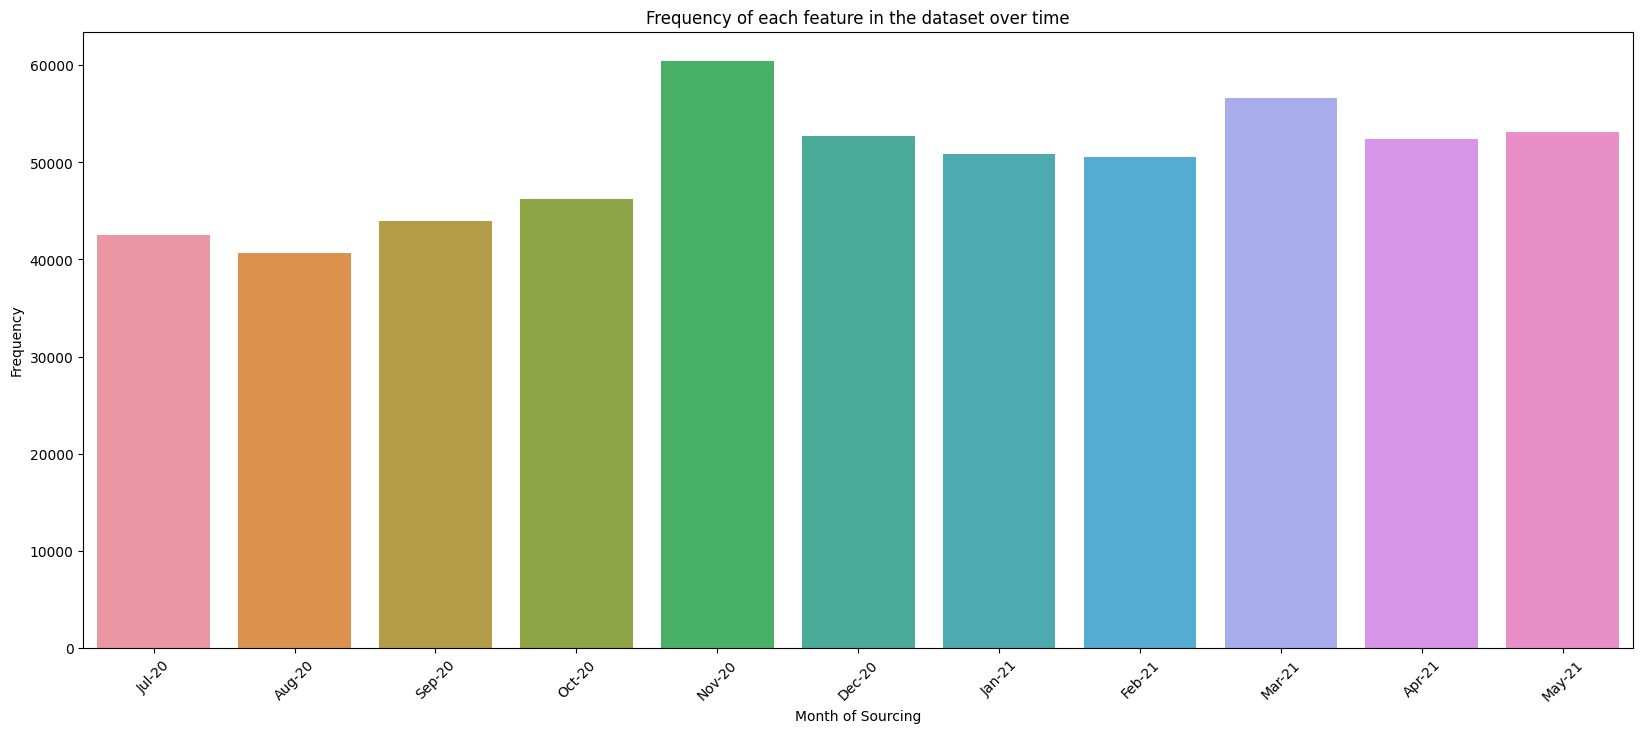

In [57]:
# Frequency of each feature in the dataset over time
plt.figure(figsize=(20, 8))
sns.countplot(x='Sourcing_Month', data=train_sorted, order=month_order)
plt.title('Frequency of each feature in the dataset over time')
plt.xlabel('Month of Sourcing')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-info"> Majority of the Orders came during November 2020 while least during July to August 2020</div>

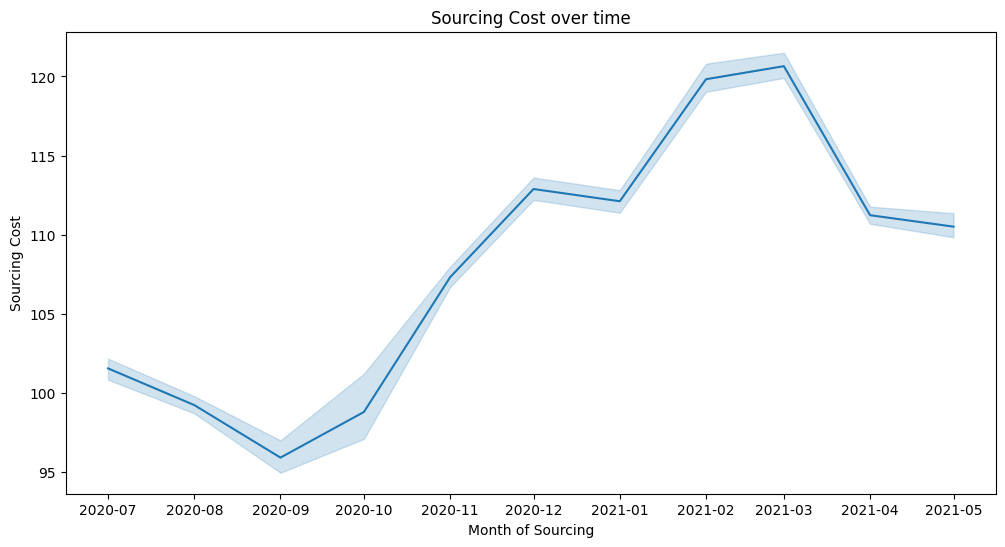

In [58]:
# plot the sourcing cost over time
plt.figure(figsize=(12,6))
sns.lineplot(x='Month of Sourcing', y='Sourcing Cost', data=train)
plt.title('Sourcing Cost over time')
plt.show()

<div class="alert alert-block alert-info"> We can notice the sourcing cost increasing drastically after November 2020, with peak at March 2021, following which we see a dip that stabilizes we enter May 2025</div>

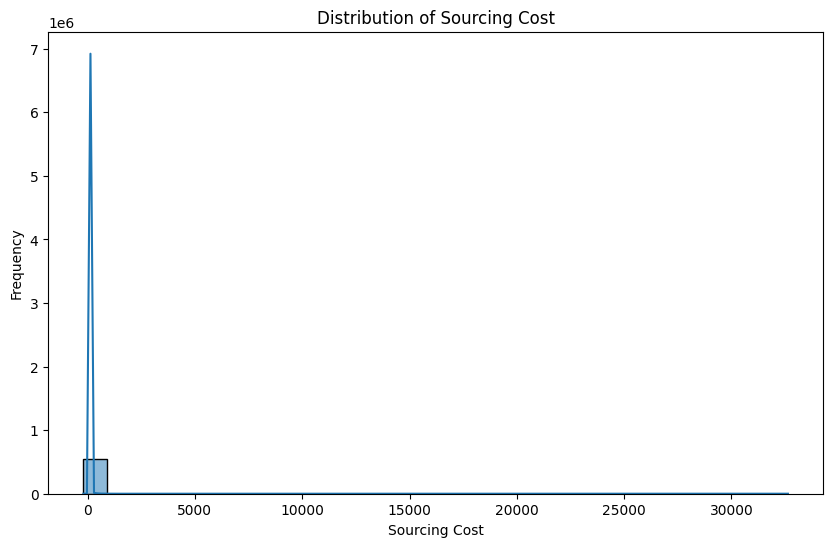

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(train['Sourcing Cost'], bins=30, kde=True)
plt.title('Distribution of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

### Average Sourcing Costs Visualization

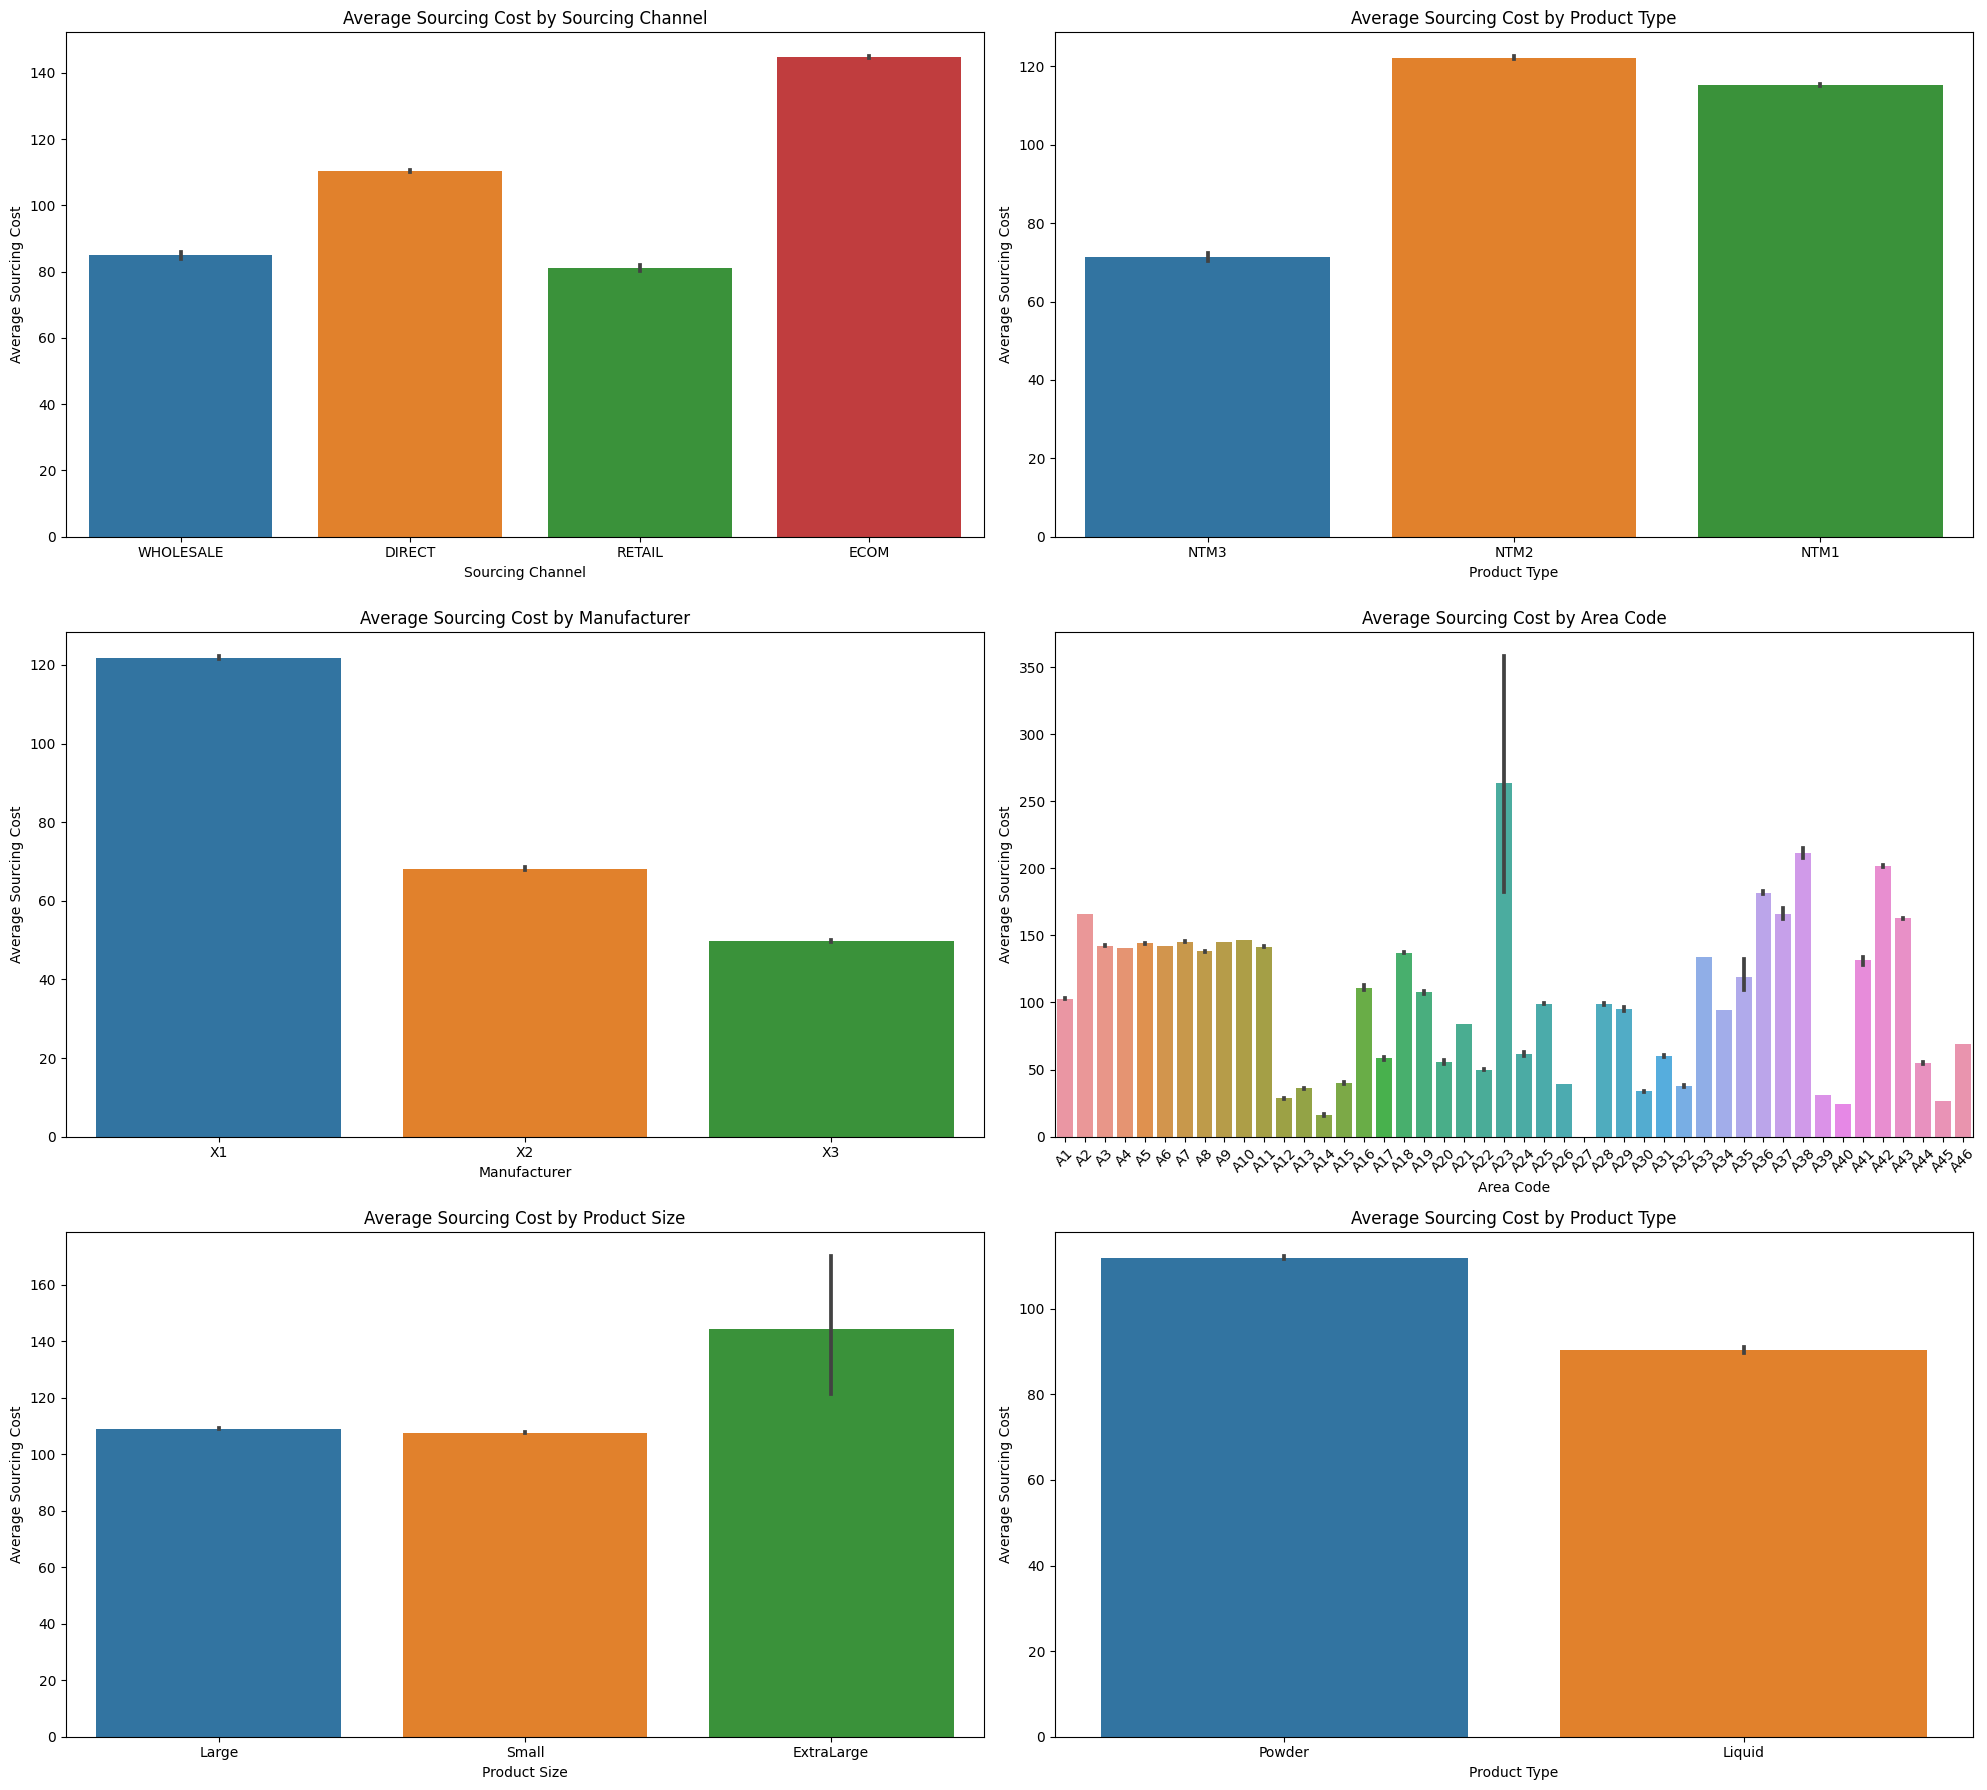

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with multiple rows and columns
fig, axs = plt.subplots(3, 2, figsize=(20, 18))

# Plot Average Sourcing Cost by Sourcing Channel
sns.barplot(x='Sourcing Channel', y='Sourcing Cost', data=train, ax=axs[0, 0])
axs[0, 0].set_title('Average Sourcing Cost by Sourcing Channel')
axs[0, 0].set_xlabel('Sourcing Channel')
axs[0, 0].set_ylabel('Average Sourcing Cost')

# Plot Average Sourcing Cost by Product Type
sns.barplot(x='ProductType', y='Sourcing Cost', data=train, ax=axs[0, 1])
axs[0, 1].set_title('Average Sourcing Cost by Product Type')
axs[0, 1].set_xlabel('Product Type')
axs[0, 1].set_ylabel('Average Sourcing Cost')

# Plot Average Sourcing Cost by Manufacturer
sns.barplot(x='Manufacturer', y='Sourcing Cost', data=train, ax=axs[1, 0])
axs[1, 0].set_title('Average Sourcing Cost by Manufacturer')
axs[1, 0].set_xlabel('Manufacturer')
axs[1, 0].set_ylabel('Average Sourcing Cost')

# Define the order of 'Area Code' categories
area_code_order = [f'A{i}' for i in range(1, 47)]

# Plot Average Sourcing Cost by Area Code
sns.barplot(x='Area Code', y='Sourcing Cost', data=train, order=area_code_order, ax=axs[1, 1])
axs[1, 1].set_title('Average Sourcing Cost by Area Code')
axs[1, 1].set_xlabel('Area Code')
axs[1, 1].set_ylabel('Average Sourcing Cost')
axs[1, 1].tick_params(axis='x', rotation=45)

# Plot Average Sourcing Cost by Product Size
sns.barplot(x='Product Size', y='Sourcing Cost', data=train, ax=axs[2, 0])
axs[2, 0].set_title('Average Sourcing Cost by Product Size')
axs[2, 0].set_xlabel('Product Size')
axs[2, 0].set_ylabel('Average Sourcing Cost')

# Plot Average Sourcing Cost by Product Type
sns.barplot(x='Product Type', y='Sourcing Cost', data=train, ax=axs[2, 1])
axs[2, 1].set_title('Average Sourcing Cost by Product Type')
axs[2, 1].set_xlabel('Product Type')
axs[2, 1].set_ylabel('Average Sourcing Cost')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

<div class="alert alert-block alert-info"> 
    <h4>Analysis of Average Sourcing Costs</h4>
    <ul> 
        <li>E-Commerce leads the driving source channel compared to other channels when measuring the average sourcing costs. </li>
        <li>X1 is also has the highest average sourcing costs compared to X2 and X3 which seem to have only around half of average sourcing costs of X1</li>
        <li>NTM1 and NTM2 and Powder Type Produts have a higher sourcing costs</li>
        <li>There are no activities happening in Area Code <i>A27</i></li>
    <ul>
</div>

### Change in Sourcing Costs over time - Visualization

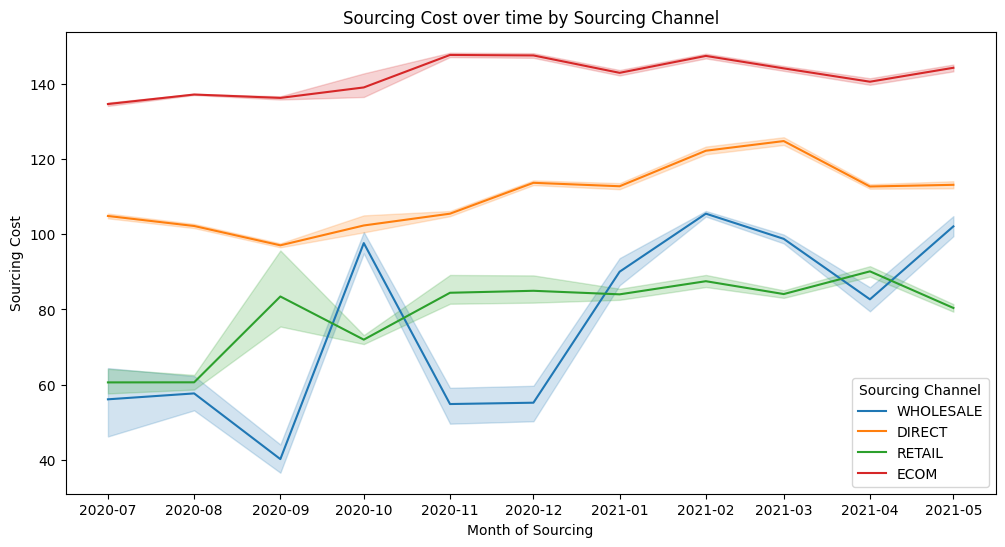

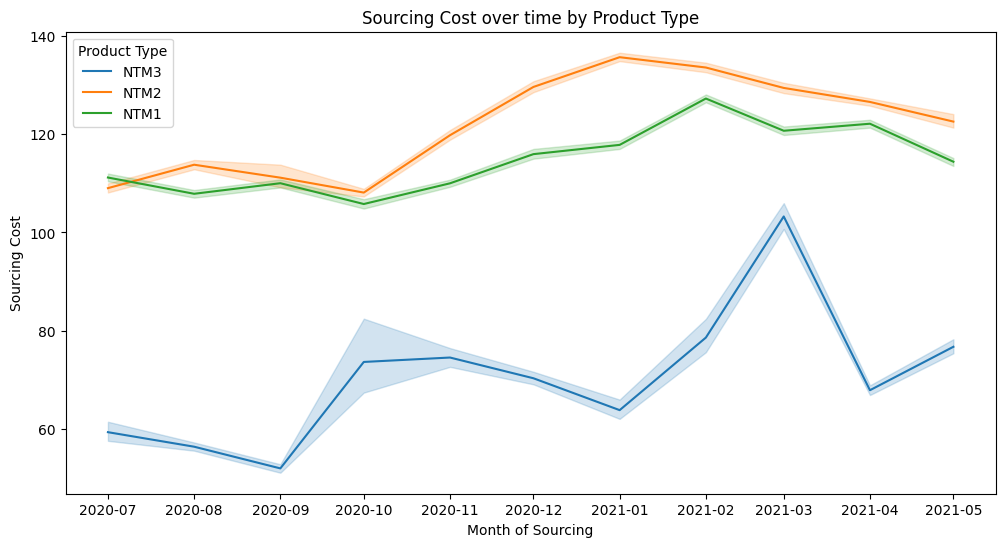

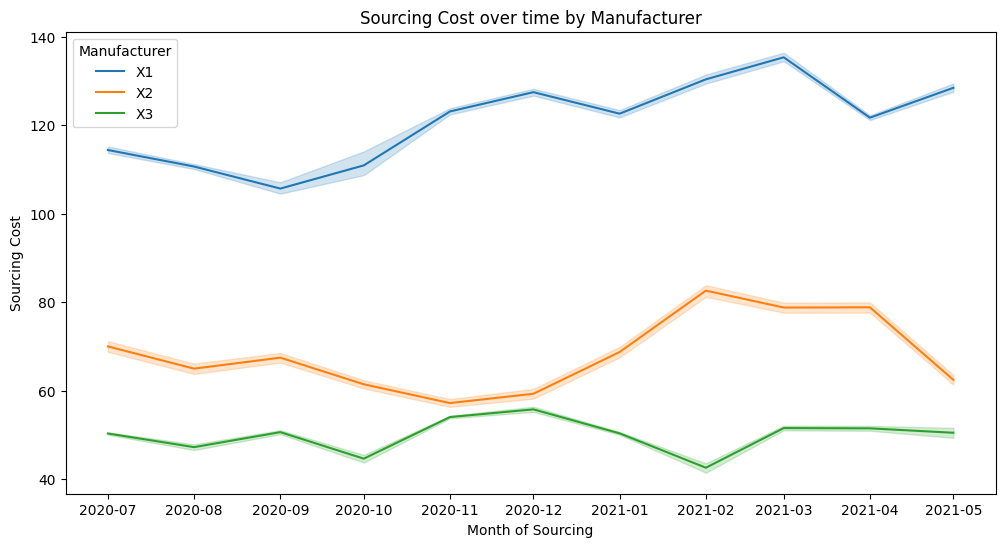

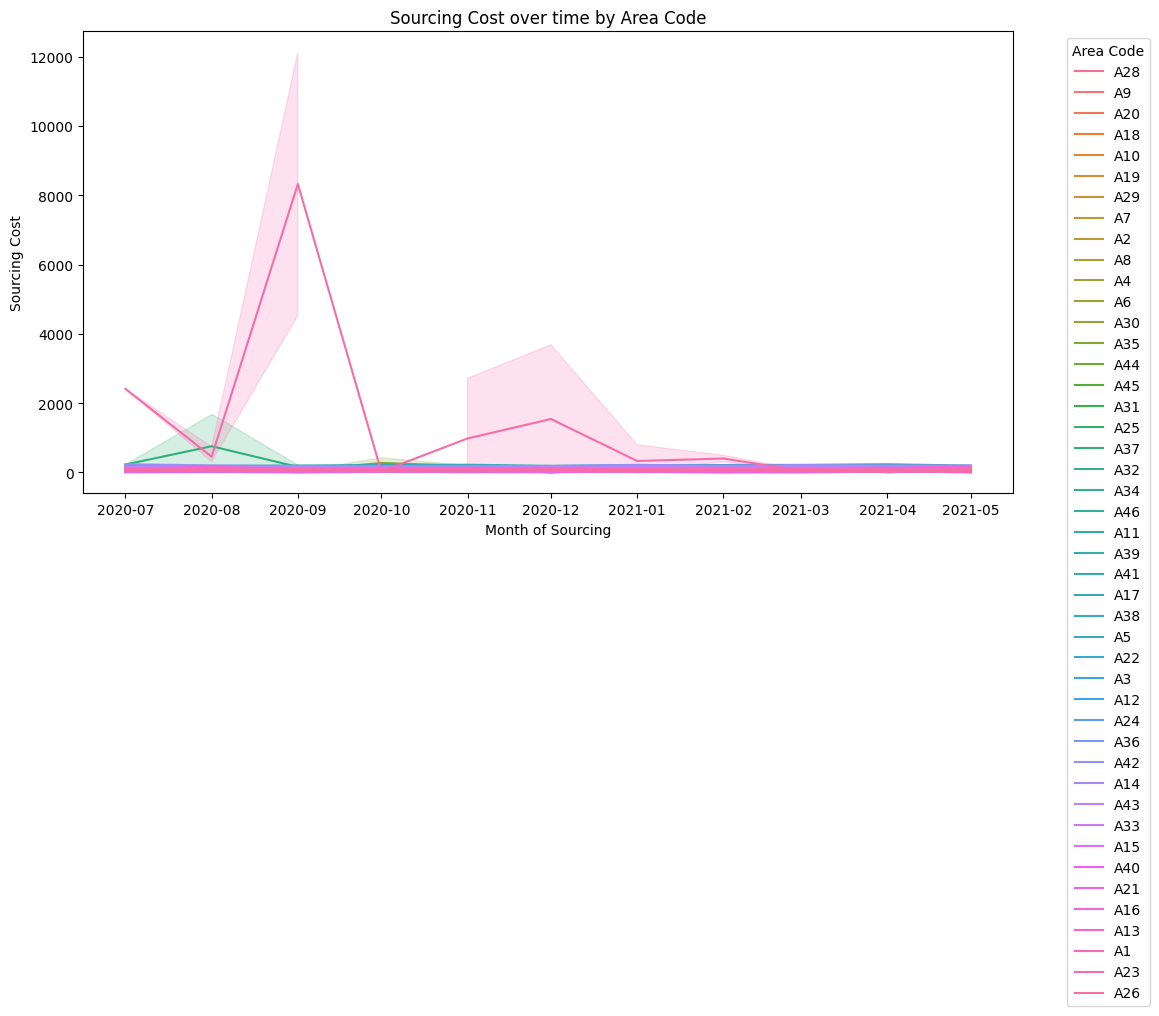

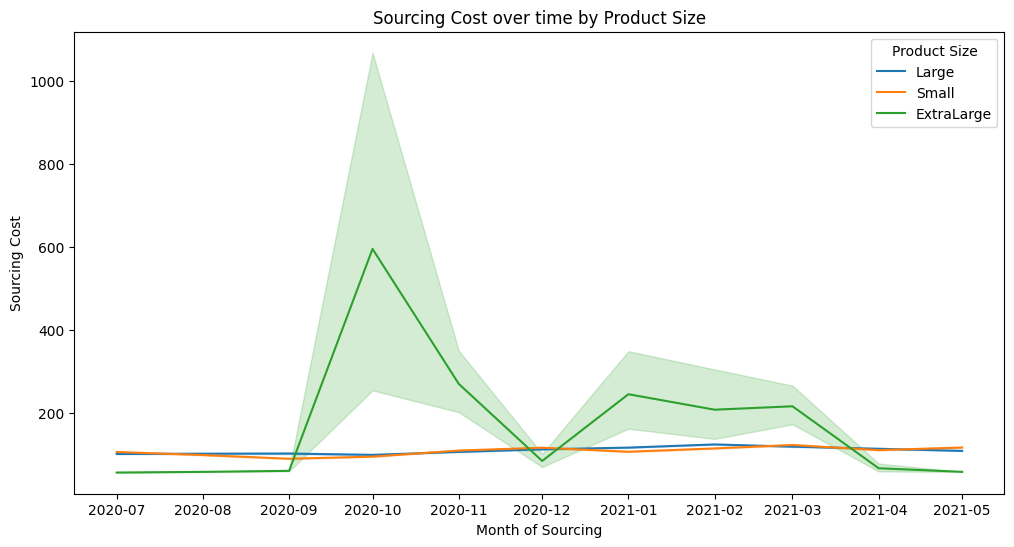

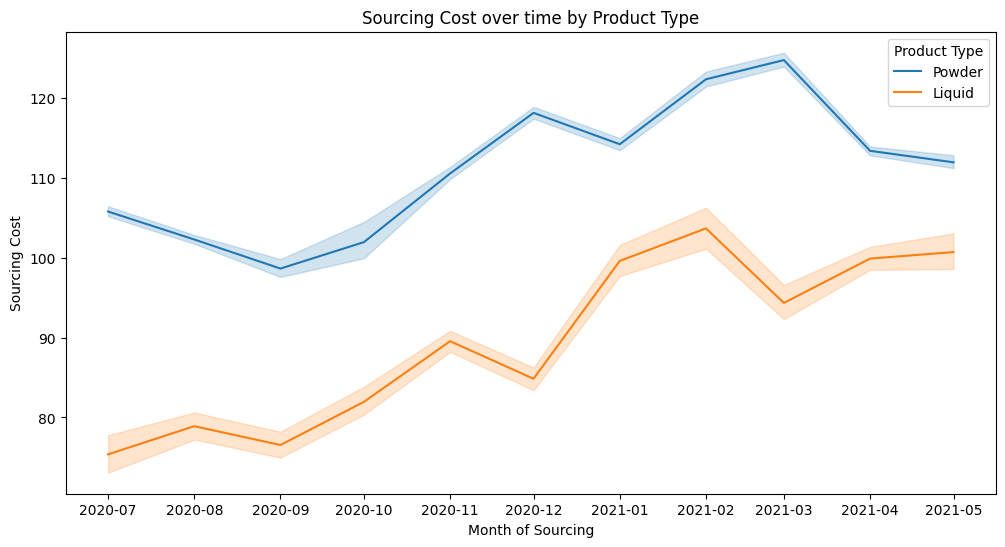

In [61]:
# Plot Sourcing Cost over time for Sourcing Channel
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month of Sourcing', y='Sourcing Cost', hue='Sourcing Channel', data=train)
plt.title('Sourcing Cost over time by Sourcing Channel')
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.legend(title='Sourcing Channel')
plt.show()

# Plot Sourcing Cost over time for Product Type
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month of Sourcing', y='Sourcing Cost', hue='ProductType', data=train)
plt.title('Sourcing Cost over time by Product Type')
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.legend(title='Product Type')
plt.show()

# Plot Sourcing Cost over time by Manufacturer
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month of Sourcing', y='Sourcing Cost', hue='Manufacturer', data=train)
plt.title('Sourcing Cost over time by Manufacturer')
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.legend(title='Manufacturer')
plt.show()

# Plot Sourcing Cost over time by Area Code
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month of Sourcing', y='Sourcing Cost', hue='Area Code', data=train)
plt.title('Sourcing Cost over time by Area Code')
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.legend(title='Area Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot Sourcing Cost over time by Product Size
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month of Sourcing', y='Sourcing Cost', hue='Product Size', data=train)
plt.title('Sourcing Cost over time by Product Size')
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.legend(title='Product Size')
plt.show()

# Plot Sourcing Cost over time by Product Type
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month of Sourcing', y='Sourcing Cost', hue='Product Type', data=train)
plt.title('Sourcing Cost over time by Product Type')
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.legend(title='Product Type')
plt.show()

## Average Source Costing by Month

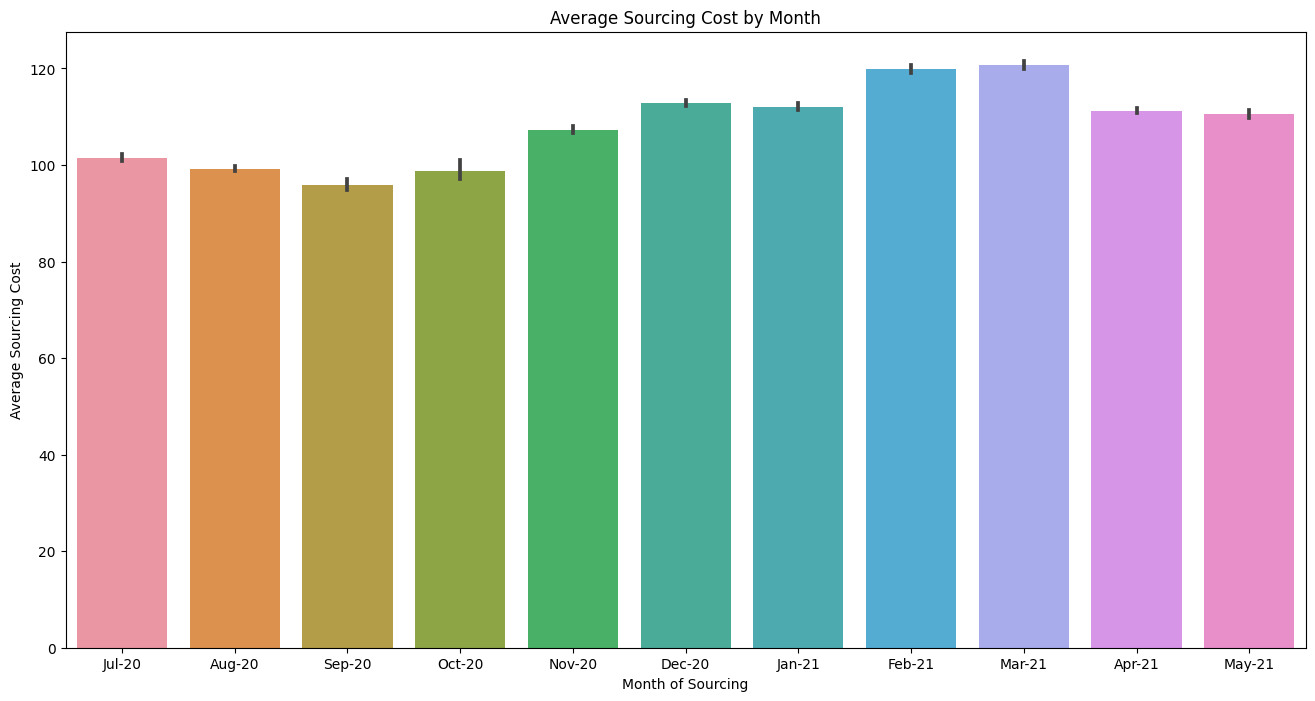

In [62]:
# Bar Plot of Average 'Sourcing Cost' by Month
plt.figure(figsize=(16, 8))
sns.barplot(x='Sourcing_Month', y='Sourcing Cost', data=train_sorted, order=month_order)
plt.title('Average Sourcing Cost by Month')
plt.xlabel('Month of Sourcing')
plt.ylabel('Average Sourcing Cost')
plt.show()

<div class="alert alert-block alert-warning"> The average sourcing cost has steadily increased in 2021</div>

---

### Facet Plot Comparing Sourcing Cost with Month for each Manufacture and Product Size

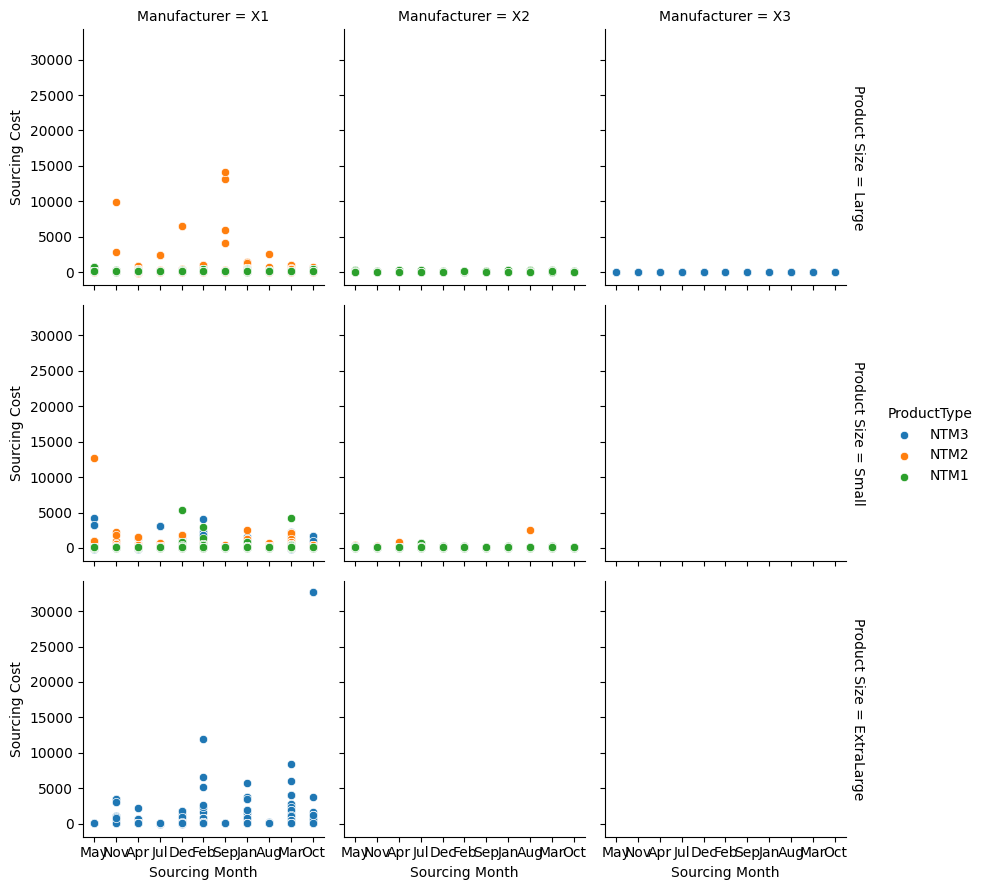

In [63]:
# Facet Grid Plot of 'Sourcing Cost' by Multiple Categorical Variables
g = sns.FacetGrid(train, col='Manufacturer', row='Product Size', hue='ProductType', margin_titles=True)
g.map(sns.scatterplot, 'Sourcing Month', 'Sourcing Cost')
g.set_axis_labels('Sourcing Month', 'Sourcing Cost')
g.add_legend()
plt.show()

<div class="alert alert-block alert-info"> Manufacturer X1 has the highest sourcing costs across all three product sizes and generally incurs high sourcing costs during January, February and March</div>

---
## Modeling

In [64]:
train

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,Sourcing Year,Sourcing Month,Sourcing_Month,Sourcing_Month_Num
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.16,2021,May,May-21,11
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.28,2020,Oct,Oct-20,4
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.46,2020,Dec,Dec-20,6
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.22,2021,Feb,Feb-21,8
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.76,2020,Nov,Nov-20,5
...,...,...,...,...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,2020-07-01,136.47,2020,Jul,Jul-20,1
550172,NTM3,X1,A14,DIRECT,Large,Liquid,2020-10-01,72.56,2020,Oct,Oct-20,4
550173,NTM2,X1,A5,DIRECT,Small,Powder,2021-03-01,147.64,2021,Mar,Mar-21,9
550174,NTM2,X1,A7,DIRECT,Small,Powder,2021-02-01,150.04,2021,Feb,Feb-21,8


In [65]:
# Extract temporal features from 'Month of Sourcing'
train['Month'] = train['Month of Sourcing'].dt.month
train['Year'] = train['Month of Sourcing'].dt.year

In [66]:
# Extract temporal features from 'Month of Sourcing'
test['Month'] = test['Month of Sourcing'].dt.month
test['Year'] = test['Month of Sourcing'].dt.year

### Prepare Features and Target Variables

In [99]:
# Encode categorical variables
train_encoded = pd.get_dummies(train, columns=['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type'])
test_encoded = pd.get_dummies(test, columns=['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type'])

X_train = train_encoded.drop(['Month of Sourcing', 'Sourcing Cost', 'Sourcing Year', 'Sourcing Month', 'Sourcing_Month', 'Sourcing_Month_Num'], axis=1)
y_train = train_encoded['Sourcing Cost']
X_test = test_encoded.drop(['Month of Sourcing', 'Sourcing Cost', 'Sourcing Year', 'Sourcing Month'], axis=1)
y_test = test_encoded['Sourcing Cost']

In [163]:
len(X_train.columns)

62

In [164]:
len(X_test.columns)

62

### Linear Regression

In [100]:
# Model Selection (Linear Regression)
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

In [101]:
#Model Training
LR_model.fit(X_train, y_train)

LinearRegression()

In [102]:
y_pred_train_lr = LR_model.predict(X_train)
y_pred_test_lr = LR_model.predict(X_test)

In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate Mean Squared Error (MSE)
LR_mse_train = mean_squared_error(y_train, y_pred_train_lr)
LR_mse_test = mean_squared_error(y_test, y_pred_test_lr)
print("\nLinear Reg Train MSE:", LR_mse_train)
print("Linear Reg Test MSE:", LR_mse_test)

# Calculate Root Mean Squared Error (RMSE)
LR_rmse_train = np.sqrt(LR_mse_train)
LR_rmse_test = np.sqrt(LR_mse_test)
print("\nLinear Reg Train RMSE:", LR_rmse_train)
print("Linear Reg Test RMSE:", LR_rmse_test)

# Calculate Mean Absolute Error (MAE)
LR_mae_train = mean_absolute_error(y_train, y_pred_train_lr)
LR_mae_test = mean_absolute_error(y_test, y_pred_test_lr)
print("\nLinear Reg Train MAE:", LR_mae_train)
print("Linear Reg Test MAE:", LR_mae_test)

# Calculate R-squared (R2) score
LR_r2_train = r2_score(y_train, y_pred_train_lr)
LR_r2_test = r2_score(y_test, y_pred_test_lr)
print("\nLinear Reg Train R2 Score:", LR_r2_train)
print("Linear Reg Test R2 Score:", LR_r2_test)



Linear Reg Train MSE: 8490.209887823248
Linear Reg Test MSE: 1806.1054281748175

Linear Reg Train RMSE: 92.14233493798194
Linear Reg Test RMSE: 42.498299120962685

Linear Reg Train MAE: 20.946583667906665
Linear Reg Test MAE: 26.50238993326823

Linear Reg Train R2 Score: 0.22088664635445454
Linear Reg Test R2 Score: 0.33426711077848237


### Decision Tree

In [104]:
from sklearn.tree import DecisionTreeRegressor

# Model Selection (Decision Tree)
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Model Training
decision_tree_model.fit(X_train, y_train)

y_pred_train_dt = decision_tree_model.predict(X_train)
y_pred_test_dt = decision_tree_model.predict(X_test)

In [105]:
# Calculate Mean Squared Error (MSE)
dt_mse_train = mean_squared_error(y_train, y_pred_train_dt)
dt_mse_test = mean_squared_error(y_test, y_pred_test_dt)
print("\nDecision Tree Train MSE:", dt_mse_train)
print("Decision Tree Test MSE:", dt_mse_test)

# Calculate Root Mean Squared Error (RMSE)
dt_rmse_train = np.sqrt(dt_mse_train)
dt_rmse_test = np.sqrt(dt_mse_test)
print("\nDecision Tree Train RMSE:", dt_rmse_train)
print("Decision Tree Test RMSE:", dt_rmse_test)

# Calculate Mean Absolute Error (MAE)
dt_mae_train = mean_absolute_error(y_train, y_pred_train_dt)
dt_mae_test = mean_absolute_error(y_test, y_pred_test_dt)
print("\nDecision Tree Train MAE:", dt_mae_train)
print("Decision Tree Test MAE:", dt_mae_test)

# Calculate R-squared (R2) score
dt_r2_train = r2_score(y_train, y_pred_train_dt)
dt_r2_test = r2_score(y_test, y_pred_test_dt)
print("\nDecision Tree Train R2 Score:", dt_r2_train)
print("Decision Tree Test R2 Score:", dt_r2_test)


Decision Tree Train MSE: 7208.582069900198
Decision Tree Test MSE: 1074.0046737987361

Decision Tree Train RMSE: 84.90336901383948
Decision Tree Test RMSE: 32.772010524207026

Decision Tree Train MAE: 12.597307080387814
Decision Tree Test MAE: 16.576718250669924

Decision Tree Train R2 Score: 0.33849661837405776
Decision Tree Test R2 Score: 0.6041204331864509


### Random Forest

In [107]:
from sklearn.ensemble import RandomForestRegressor

# Model Selection (Random Forest)
random_forest_model = RandomForestRegressor(random_state=42)

# Model Training
random_forest_model.fit(X_train, y_train)

# Model Evaluation
y_pred_train_rf = random_forest_model.predict(X_train)
y_pred_test_rf = random_forest_model.predict(X_test)


In [108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate Mean Squared Error (MSE)
rf_mse_train = mean_squared_error(y_train, y_pred_train_rf)
rf_mse_test = mean_squared_error(y_test, y_pred_test_rf)
print("\nRandom Forest Train MSE:", rf_mse_train)
print("Random Forest Test MSE:", rf_mse_test)

# Calculate Root Mean Squared Error (RMSE)
rf_rmse_train = np.sqrt(rf_mse_train)
rf_rmse_test = np.sqrt(rf_mse_test)
print("\nRandom Forest Train RMSE:", rf_rmse_train)
print("Random Forest Test RMSE:", rf_rmse_test)

# Calculate Mean Absolute Error (MAE)
rf_mae_train = mean_absolute_error(y_train, y_pred_train_rf)
rf_mae_test = mean_absolute_error(y_test, y_pred_test_rf)
print("\nRandom Forest Train MAE:", rf_mae_train)
print("Random Forest Test MAE:", rf_mae_test)

# Calculate R-squared (R2) score
rf_r2_train = r2_score(y_train, y_pred_train_rf)
rf_r2_test = r2_score(y_test, y_pred_test_rf)
print("\nRandom Forest Train R2 Score:", rf_r2_train)
print("Random Forest Test R2 Score:", rf_r2_test)



Random Forest Train MSE: 7222.763838526561
Random Forest Test MSE: 1064.6981091611935

Random Forest Train RMSE: 84.98684509102901
Random Forest Test RMSE: 32.629712060654064

Random Forest Train MAE: 12.608931134070836
Random Forest Test MAE: 16.52135973710835

Random Forest Train R2 Score: 0.33719521293637145
Random Forest Test R2 Score: 0.6075508454249764


### Optimized Decision Tree

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required at each leaf node
}

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Perform Grid Search CV to find the best hyperparameters
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Decision Tree model with the best hyperparameters
best_decision_tree_model = DecisionTreeRegressor(**best_params, random_state=42)
best_decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_train_dt_optimized = best_decision_tree_model.predict(X_train)
y_pred_test_dt_optimized = best_decision_tree_model.predict(X_test)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [110]:
# Evaluate the optimized model
dt_mse_train_optimized = mean_squared_error(y_train, y_pred_train_dt_optimized)
dt_mse_test_optimized = mean_squared_error(y_test, y_pred_test_dt_optimized)
print("\nOptimized Decision Tree Train MSE:", dt_mse_train_optimized)
print("Optimized Decision Tree Test MSE:", dt_mse_test_optimized)

# Calculate Root Mean Squared Error (RMSE)
dt_rmse_train_optimized = np.sqrt(dt_mse_train_optimized)
dt_rmse_test_optimized = np.sqrt(dt_mse_test_optimized)
print("\nOptimized Decision Tree Train RMSE:", dt_rmse_train_optimized)
print("Optimized Decision Tree Test RMSE:", dt_rmse_test_optimized)

# Calculate Mean Absolute Error (MAE)
dt_mae_train_optimized = mean_absolute_error(y_train, y_pred_train_dt_optimized)
dt_mae_test_optimized = mean_absolute_error(y_test, y_pred_test_dt_optimized)
print("\nOptimized Decision Tree Train MAE:", dt_mae_train_optimized)
print("Optimized Decision Tree Test MAE:", dt_mae_test_optimized)

# Calculate R-squared (R2) score
dt_r2_train_optimized = r2_score(y_train, y_pred_train_dt_optimized)
dt_r2_test_optimized = r2_score(y_test, y_pred_test_dt_optimized)
print("\nOptimized Decision Tree Train R2 Score:", dt_r2_train_optimized)
print("Optimized Decision Tree Test R2 Score:", dt_r2_test_optimized)


Optimized Decision Tree Train MSE: 7208.582069900198
Optimized Decision Tree Test MSE: 1074.0046737987361

Optimized Decision Tree Train RMSE: 84.90336901383948
Optimized Decision Tree Test RMSE: 32.772010524207026

Optimized Decision Tree Train MAE: 12.597307080387814
Optimized Decision Tree Test MAE: 16.576718250669924

Optimized Decision Tree Train R2 Score: 0.33849661837405776
Optimized Decision Tree Test R2 Score: 0.6041204331864509


Did not perform better than Default DT

---
### Detecting and Removing Outliers

In [111]:
from scipy import stats

def remove_outliers(df):
    cleaned_df = df.copy()
    
    # Define a function to detect outliers using Z-score
    def detect_outliers_zscore(data):
        outliers = {}
        for column in data.columns:
            if pd.api.types.is_numeric_dtype(data[column]):
                z_scores = np.abs(stats.zscore(data[column]))
                outliers[column] = data[z_scores > 3]
        return outliers
    
    # Detect and remove outliers from each column
    outliers = detect_outliers_zscore(cleaned_df)
    for column, df_outliers in outliers.items():
        cleaned_df = cleaned_df.drop(df_outliers.index)
    
    return cleaned_df

# Clean the training dataset
cleaned_train = remove_outliers(train)

# Clean the testing dataset
cleaned_test = remove_outliers(test)

In [116]:
cleaned_train = cleaned_train.drop(['Sourcing_Month', 'Sourcing_Month_Num'], axis=1)

In [120]:
# Encode categorical variables
train_encoded = pd.get_dummies(cleaned_train, columns=['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type'])
test_encoded = pd.get_dummies(cleaned_test, columns=['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type'])

clean_X_train = train_encoded.drop(['Month of Sourcing', 'Sourcing Cost', 'Sourcing Year', 'Sourcing Month'], axis=1)
clean_y_train = train_encoded['Sourcing Cost']
clean_X_test = test_encoded.drop(['Month of Sourcing', 'Sourcing Cost', 'Sourcing Year', 'Sourcing Month'], axis=1)
clean_y_test = test_encoded['Sourcing Cost']

### Fitting cleaned data on Decision Tree

In [126]:
from sklearn.tree import DecisionTreeRegressor

# Model Selection (Decision Tree)
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Model Training
decision_tree_model.fit(clean_X_train, clean_y_train)

clean_y_pred_train_dt = decision_tree_model.predict(clean_X_train)
clean_y_pred_test_dt = decision_tree_model.predict(clean_X_test)

In [127]:
# Calculate Mean Squared Error (MSE)
clean_dt_mse_train = mean_squared_error(clean_y_train, clean_y_pred_train_dt)
clean_dt_mse_test = mean_squared_error(clean_y_test, clean_y_pred_test_dt)
print("\nCleaned Decision Tree Train MSE:", clean_dt_mse_train)
print("Cleaned Decision Tree Test MSE:", clean_dt_mse_test)

# Calculate Root Mean Squared Error (RMSE)
clean_dt_rmse_train = np.sqrt(clean_dt_mse_train)
clean_dt_rmse_test = np.sqrt(clean_dt_mse_test)
print("\nCleaned Decision Tree Train RMSE:", clean_dt_rmse_train)
print("Cleaned Decision Tree Test RMSE:", clean_dt_rmse_test)

# Calculate Mean Absolute Error (MAE)
clean_dt_mae_train = mean_absolute_error(clean_y_train, clean_y_pred_train_dt)
clean_dt_mae_test = mean_absolute_error(clean_y_test, clean_y_pred_test_dt)
print("\nCleaned Decision Tree Train MAE:", dt_mae_train)
print("Cleaned Decision Tree Test MAE:", dt_mae_test)

# Calculate R-squared (R2) score
clean_dt_r2_train = r2_score(clean_y_train, clean_y_pred_train_dt)
clean_dt_r2_test = r2_score(clean_y_test, clean_y_pred_test_dt)
print("\nCleaned Decision Tree Train R2 Score:", clean_dt_r2_train)
print("Cleaned Decision Tree Test R2 Score:", clean_dt_r2_test)


Cleaned Decision Tree Train MSE: 483.1438818650943
Cleaned Decision Tree Test MSE: 1073.760032138203

Cleaned Decision Tree Train RMSE: 21.980534157865552
Cleaned Decision Tree Test RMSE: 32.76827783296222

Cleaned Decision Tree Train MAE: 12.597307080387814
Cleaned Decision Tree Test MAE: 16.576718250669924

Cleaned Decision Tree Train R2 Score: 0.8515221065795423
Cleaned Decision Tree Test R2 Score: 0.604210608431456


In [129]:
# Add predicted sourcing cost to the test dataset
cleaned_test['Predicted Sourcing Cost'] = clean_y_pred_test_dt

# Cleaning the data to make it look like original
cleaned_test = cleaned_test.drop(['Sourcing Year', 'Sourcing Month', 'Month', 'Year'], axis=1)

# Print the test dataset with predicted sourcing cost
cleaned_test

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,Predicted Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,2021-06-01,103.68,113.516164
1,NTM1,X1,A10,DIRECT,Large,Powder,2021-06-01,155.75,154.202538
2,NTM1,X1,A10,ECOM,Large,Powder,2021-06-01,143.02,149.619884
3,NTM1,X1,A11,DIRECT,Large,Powder,2021-06-01,139.39,144.105425
4,NTM1,X1,A2,DIRECT,Large,Powder,2021-06-01,169.42,171.041649
...,...,...,...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid,2021-06-01,89.57,64.613453
92,NTM3,X1,A8,DIRECT,Large,Powder,2021-06-01,114.57,120.910636
93,NTM3,X1,A8,DIRECT,Small,Powder,2021-06-01,111.26,100.967861
94,NTM3,X2,A20,DIRECT,Large,Powder,2021-06-01,32.32,8.010102


In [130]:
# Calculate the difference between Sourcing Cost and Predicted Sourcing Cost
cleaned_test['Difference'] = cleaned_test['Sourcing Cost'] - cleaned_test['Predicted Sourcing Cost']

# Print the DataFrame with the new "Difference" column
cleaned_test

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,Predicted Sourcing Cost,Difference
0,NTM1,X1,A1,DIRECT,Small,Powder,2021-06-01,103.68,113.516164,-9.836164
1,NTM1,X1,A10,DIRECT,Large,Powder,2021-06-01,155.75,154.202538,1.547462
2,NTM1,X1,A10,ECOM,Large,Powder,2021-06-01,143.02,149.619884,-6.599884
3,NTM1,X1,A11,DIRECT,Large,Powder,2021-06-01,139.39,144.105425,-4.715425
4,NTM1,X1,A2,DIRECT,Large,Powder,2021-06-01,169.42,171.041649,-1.621649
...,...,...,...,...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid,2021-06-01,89.57,64.613453,24.956547
92,NTM3,X1,A8,DIRECT,Large,Powder,2021-06-01,114.57,120.910636,-6.340636
93,NTM3,X1,A8,DIRECT,Small,Powder,2021-06-01,111.26,100.967861,10.292139
94,NTM3,X2,A20,DIRECT,Large,Powder,2021-06-01,32.32,8.010102,24.309898


In [146]:
# Calculate the total sum of the "Difference" column
total_difference_sum = cleaned_test['Difference'].sum()

# Calculate the number of rows in the DataFrame
num_rows = cleaned_test.shape[0]

# Calculate the average difference
average_difference = total_difference_sum / num_rows

# Print the average difference
print("Average Deviation:", average_difference)

Average Deviation: -4.229070880740116


In [158]:
# reset index 
cleaned_test.reset_index(drop=True, inplace=True)

#### Comparitive Graph

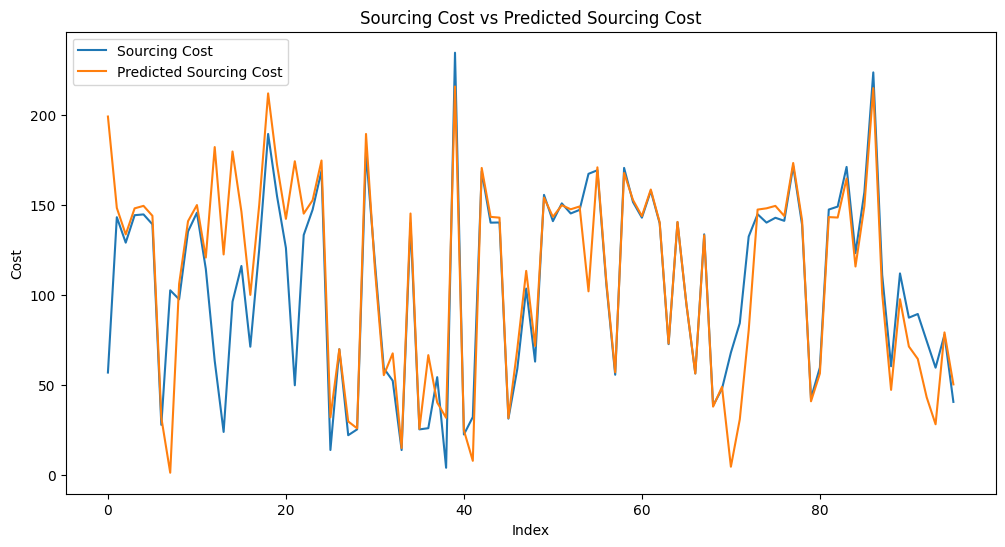

In [159]:
plt.figure(figsize=(12, 6))
plt.plot(cleaned_test.index, cleaned_test['Sourcing Cost'], label='Sourcing Cost')
plt.plot(cleaned_test.index, cleaned_test['Predicted Sourcing Cost'], label='Predicted Sourcing Cost')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Cost')
plt.title('Sourcing Cost vs Predicted Sourcing Cost')
plt.legend()

# Display the plot
plt.show()


## Comparitive Metrics of various models

<table>
  <tr>
    <th rowspan=3>Algorithm</th>
    <th colspan=2>MSE</th>
    <th colspan=2>RMSE</th>
    <th colspan=2>MAE</th>
    <th colspan=2>R2 Score</th>
  </tr>
  <tr>
  </tr>
  <tr>
    <th>Train</th>
    <th>Test</th>
    <th>Train</th>
    <th>Test</th>
    <th>Train</th>
    <th>Test</th>
    <th>Train</th>
    <th>Test</th>
  </tr>
  <tr>
    <th>Linear Regression</th>
    <td>8490.21</td>
    <td>1806.11</td>
    <td>92.14</td>
    <td>42.5</td>
    <td>20.95</td>
    <td>26.5</td>
    <td>0.2209</td>
    <td>0.3343</td>
  </tr>
  <tr>
    <th>Decision Tree</th>
    <td>7208.58</td>
    <td>1074</td>
    <td>84.9</td>
    <td>32.77</td>
    <td>12.6</td>
    <td>16.58</td>
    <td>0.3385</td>
    <td>0.6041</td>
  </tr>
  <tr>
    <th>Random Forest</th>
    <td>7222.76</td>
    <td>1064.7</td>
    <td>84.99</td>
    <td>32.63</td>
    <td>12.61</td>
    <td>16.52</td>
    <td>0.3372</td>
    <td>0.6076</td>
  </tr>
  <tr>
    <th>Optimized Decision Tree</th>
    <td>7208.58</td>
    <td>1074</td>
    <td>84.9</td>
    <td>32.77</td>
    <td>12.6</td>
    <td>16.58</td>
    <td>0.3385</td>
    <td>0.6041</td>
  </tr>
  <tr>
    <th><u>Cleaned Decision Tree<u></th>
    <td><u>483.14<u></td>
    <td><u>1074<u></td>
    <td><u>21.98<u></td>
    <td><u>32.77<u></td>
    <td><u>12.6<u></td>
    <td><u>16.58<u></td>
    <td><u>0.8515<u></td>
    <td><u>0.6042<u></td>
  </tr>
</table>



<div class="alert alert-block alert-success">
    <h2>✅<b>Conclusion</b></h2>
    In this analysis, we aimed to build and evaluate predictive models for estimating sourcing costs in a dataset spanning various product types, manufacturers, sourcing channels, and other features. We employed linear regression, decision tree, and random forest algorithms, observing their performance metrics on both training and testing datasets. Initially, the models exhibited varying degrees of accuracy, with the linear regression model showing limited predictive power, while the decision tree and random forest models performed relatively better. Through optimization techniques such as outlier removal and feature engineering, notably employing a cleaned decision tree model, we achieved significant enhancements in predictive accuracy, reducing mean squared error from thousands to a more manageable 483.14 on the training set. Notably, the cleaned decision tree model demonstrated an impressive R-squared score of 0.8515 on the training data, indicating a strong correlation between predicted and actual sourcing costs. <br>
    Overall, this model has shown impressive similarily to predicting the sourcing costs for the test dataset for June 2021, when compared to the original data, and hence can be deployed and scaled to fit any further data.
</div>

---
# END OF FILE

---